## Dr. Michael Mahesh K Saveetha Engineering College
- michaelmaheshk@gmail.com 
- CNN with CIFAR-10 ( ColourImage)
- 19AI413-Deep Learning and Its Applications
- Unit - 2 
- 03/05
- EVEN SEM ( Slot: 4Z4-1 & 4U2-1)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sn  # for heatmaps
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transform = transforms.ToTensor()

In [3]:
train_data = datasets.CIFAR10(root='../Data', train=True, download=True, transform=transform)

In [4]:
test_data = datasets.CIFAR10(root='../Data', train=False, download=True, transform=transform)

In [5]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
torch.manual_seed(101)  # for reproducible results

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [8]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

In [9]:
# Grab the first batch of 10 images
for images,labels in train_loader: 
    break

In [10]:
labels

tensor([1, 5, 8, 1, 6, 1, 6, 3, 7, 9])

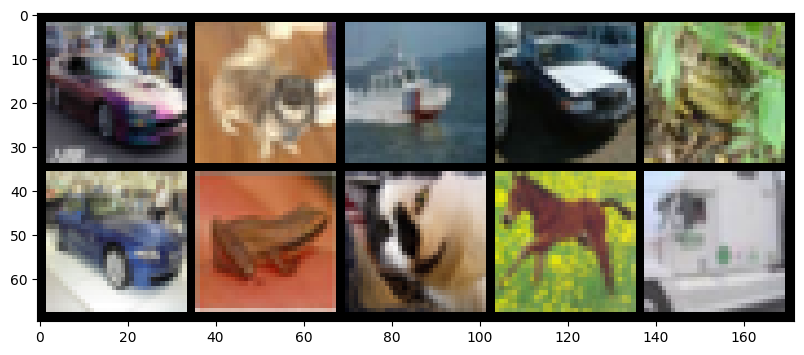

In [11]:
# Print the images
im = make_grid(images, nrow=5)  # the default nrow is 8
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));
plt.show()

Label: [5 4 0 9 1 2 2 4 2 2]
Class:    dog  deer plane truck   car  bird  bird  deer  bird  bird


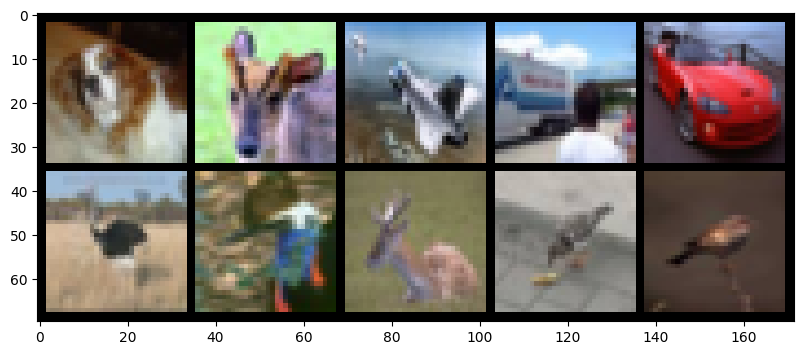

In [12]:
#np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}')) # to widen the printed array

# Grab the first batch of 10 images
for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

# Print the images
im = make_grid(images, nrow=5)  # the default nrow is 8
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));
plt.show()

In [48]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, 1)  # changed from (1, 6, 5, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(6*6*16, 120)   # changed from (4*4*16) to fit 32x32 images with 3x3 filters
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 6*6*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [49]:
#images[0].shape

In [50]:
#(((32-2)/2) -2)/2

In [51]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [52]:
for param in model.parameters():
    print(param.numel())

450
6
864
16
69120
120
10080
84
840
10


In [53]:
# 81302

In [54]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [55]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1
        
        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum().item()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b % 1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr*100/(10*b):7.3f}%')
        
    train_losses.append(loss.item())
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum().item()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss.item())
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds')  # print the time elapsed


epoch:  0  batch: 1000 [ 10000/50000]  loss: 1.60407281  accuracy:  27.230%
epoch:  0  batch: 2000 [ 20000/50000]  loss: 1.75645423  accuracy:  33.215%
epoch:  0  batch: 3000 [ 30000/50000]  loss: 2.10994101  accuracy:  36.547%
epoch:  0  batch: 4000 [ 40000/50000]  loss: 1.93061733  accuracy:  38.708%
epoch:  0  batch: 5000 [ 50000/50000]  loss: 1.65933990  accuracy:  40.238%
epoch:  1  batch: 1000 [ 10000/50000]  loss: 1.57794142  accuracy:  50.270%
epoch:  1  batch: 2000 [ 20000/50000]  loss: 1.36207628  accuracy:  50.435%
epoch:  1  batch: 3000 [ 30000/50000]  loss: 1.15163970  accuracy:  50.747%
epoch:  1  batch: 4000 [ 40000/50000]  loss: 0.79386067  accuracy:  51.138%
epoch:  1  batch: 5000 [ 50000/50000]  loss: 1.94690740  accuracy:  51.738%
epoch:  2  batch: 1000 [ 10000/50000]  loss: 1.91663575  accuracy:  55.000%
epoch:  2  batch: 2000 [ 20000/50000]  loss: 0.96561193  accuracy:  55.695%
epoch:  2  batch: 3000 [ 30000/50000]  loss: 0.68869466  accuracy:  56.037%
epoch:  2  b

In [56]:
torch.save(model.state_dict(), 'CIFAR10-CNN-Model.pt')

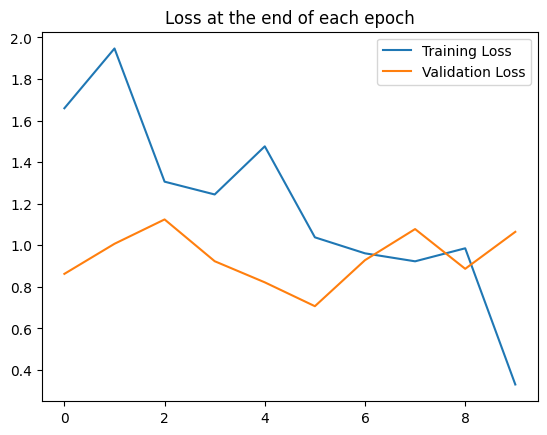

In [57]:
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss at the end of each epoch')
plt.legend()
plt.show()


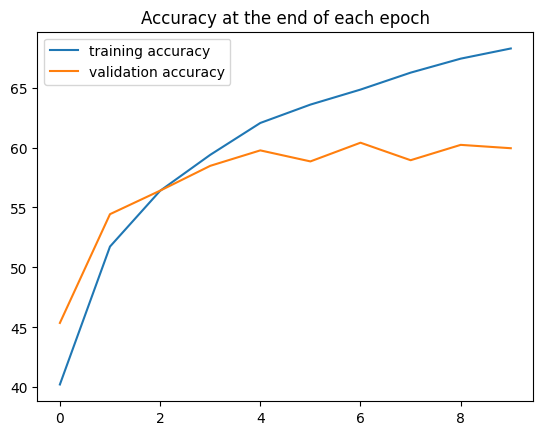

In [58]:
plt.plot([t/500 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();
plt.show()

In [59]:
print(test_correct)  # contains the results of all 10 epochs

[4537, 5444, 5640, 5847, 5976, 5884, 6040, 5894, 6022, 5994]


In [60]:
test_correct[-1]

5994

In [61]:
num_c = test_correct[-1]

In [62]:
num_c*100/10000

59.94

In [63]:
# 61.18

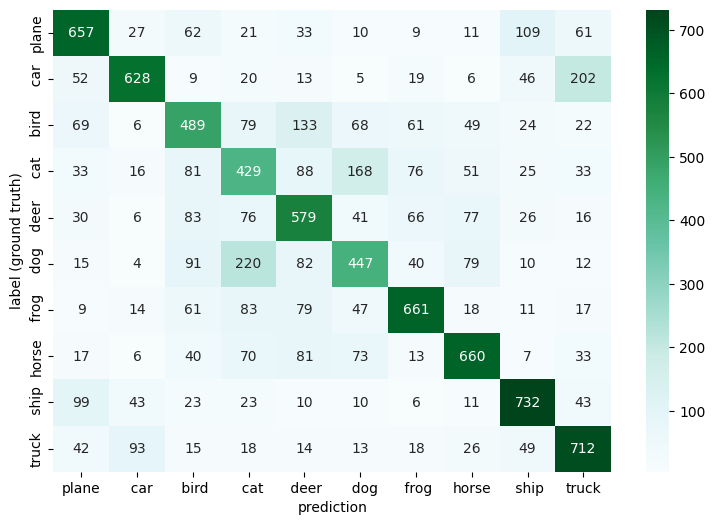

In [64]:
# Create a loader for the entire the test set
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

arr = confusion_matrix(y_test.view(-1), predicted.view(-1))
df_cm = pd.DataFrame(arr, class_names, class_names)
plt.figure(figsize = (9,6))
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.show();

## Dr. Michael Mahesh K Saveetha Engineering College
- michaelmaheshk@gmail.com 
- CNN with CIFAR-10 ( ColourImage)
- 19AI413-Deep Learning and Its Applications
- Unit - 2 
- 03/05
- EVEN SEM ( Slot: 4Z4-1 & 4U2-1)